In [1]:

import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_all=pd.read_csv(r'C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Visualisation\Visualize_all_data.cleaned.csv')
df= pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
df.shape
df_BOW=pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling_BagofWords.parquet")

df_BOW=df_BOW.sample(frac=1,random_state=42)


In [3]:
df.dropna(axis=0, inplace=True)

df_all=df_all.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114561 entries, 96862 to 121958
Columns: 1009 entries, label to BOW_young
dtypes: float64(6), int32(2), int64(1001)
memory usage: 881.9 MB


In [4]:
df_new_features=df_BOW
df_new_features.drop(columns=['id'],inplace=True)
#df_new_features.info()
df_new_features.shape

(124754, 1013)

In [5]:

df_new_features.iloc[:, :-1000].describe()

,label,word_count,avg_sentence_length,text_punctuation_frequency,text_capitalization_frequency,text_before_character_removal,text_after_character_removal,subjectivity_text,text_sentiment,text_reading_ease,text_lexical_diversity
count,124754.000000,124754.000000,124751.000000,124754.000000,124754.000000,124754.000000,124754.000000,124754.000000,124754.000000,124754.000000,124754.000000
mean,0.486846,452.419730,154.031939,38.297522,4.657903,2636.624421,2575.644597,0.364180,-0.014268,-225.207241,0.700208
std,0.499829,578.555587,255.439946,78.282398,12.025171,3089.549206,2977.097920,0.154059,0.804806,327.391496,0.124273
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-12236.080000,0.000000
25%,0.000000,152.000000,26.200000,0.000000,0.000000,983.000000,963.000000,0.291930,-0.908100,-305.440000,0.620253
50%,0.000000,316.500000,37.000000,8.000000,0.000000,1955.000000,1921.000000,0.373909,0.000000,-154.880000,0.683206
75%,1.000000,556.000000,214.000000,53.000000,6.000000,3311.000000,3246.000000,0.450000,0.883400,-45.600000,0.755814
max,1.000000,28009.000000,10210.000000,7295.000000,909.000000,142961.000000,129415.000000,1.000000,1.000000,206.840000,1.000000


In [6]:
df_new_features.columns

Index(['text', 'label', 'word_count', 'avg_sentence_length',
       'text_punctuation_frequency', 'text_capitalization_frequency',
       'text_before_character_removal', 'text_after_character_removal',
       'text_processed', 'subjectivity_text',
       ...
       'BOW_worri', 'BOW_worth', 'BOW_write', 'BOW_wrong', 'BOW_wrote',
       'BOW_ye', 'BOW_year', 'BOW_yearold', 'BOW_york', 'BOW_young'],
      dtype='object', length=1013)

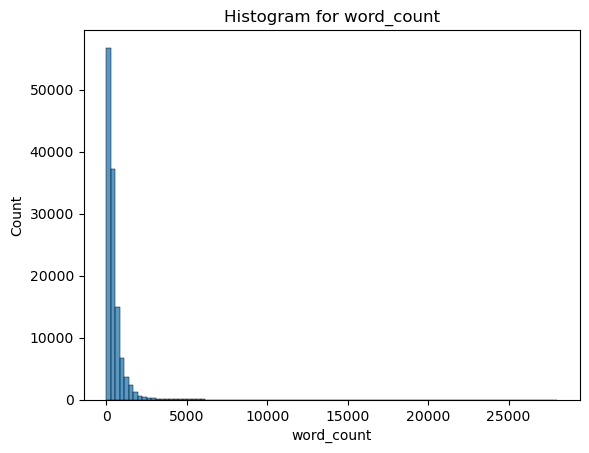

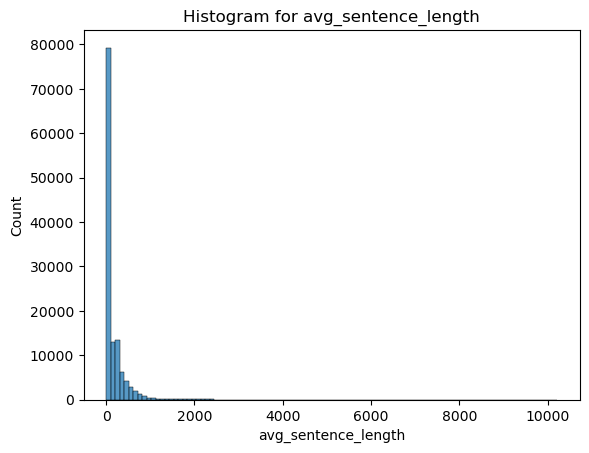

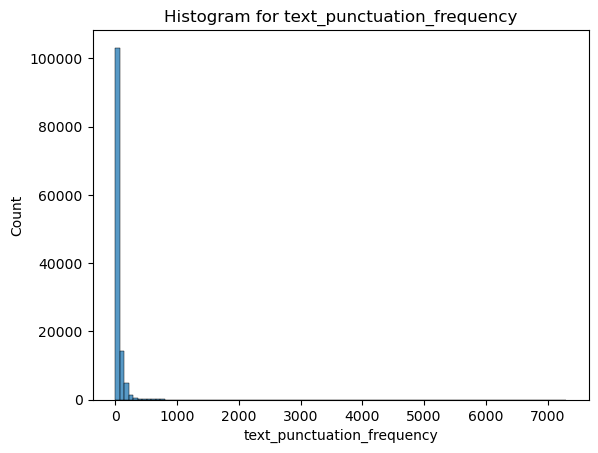

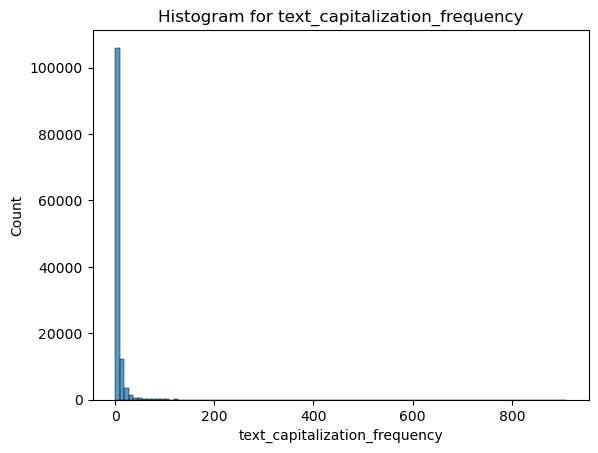

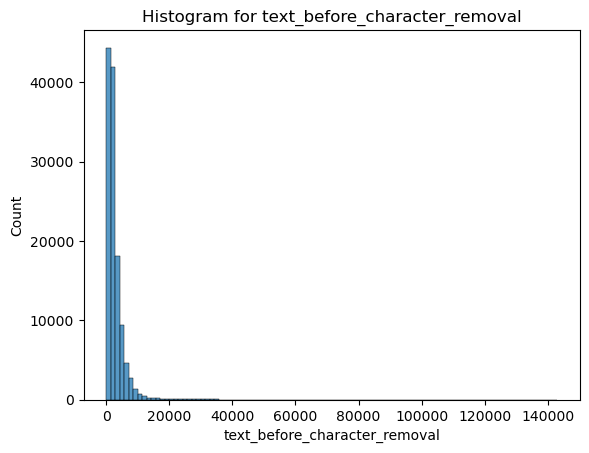

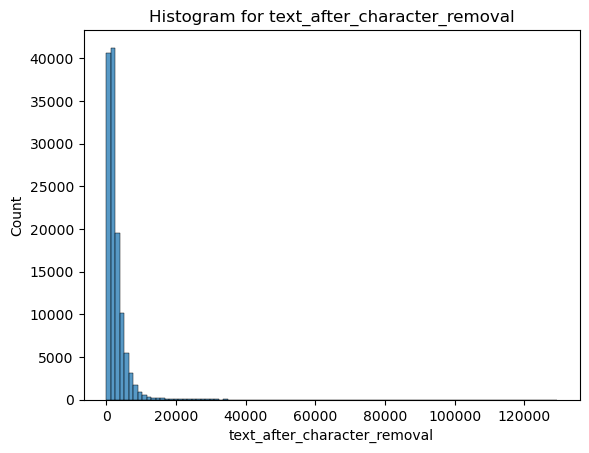

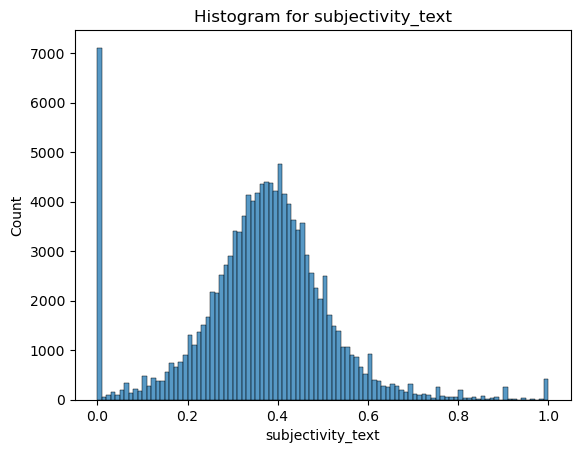

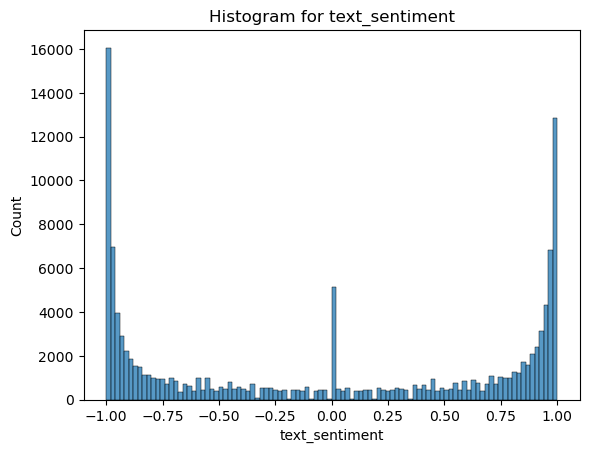

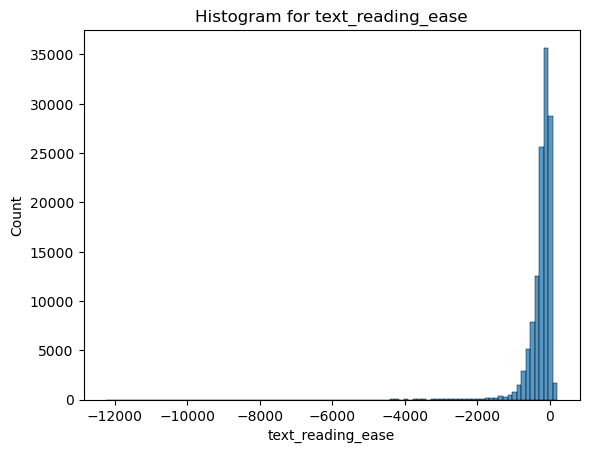

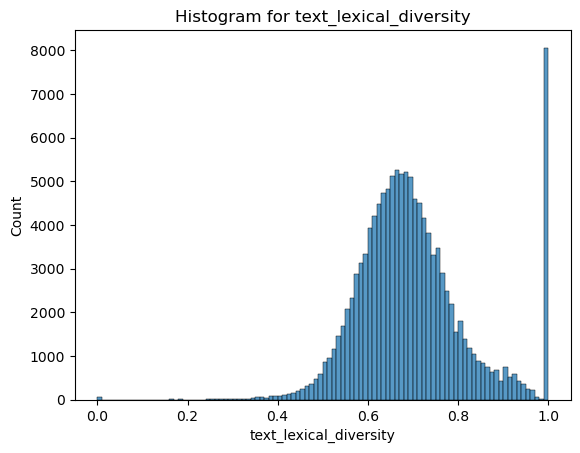

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['text', 'label', 'id', 'text_processed']

# Iterate over columns except those to be excluded
for column in df_new_features.iloc[:, :-1000].columns:
    if column not in columns_to_exclude:
        sns.histplot(df_new_features[column], bins=100, kde=False)
        plt.title(f'Histogram for {column}')
        plt.show()




In [8]:
df_new_features.shape

(124754, 1013)

In [9]:

df_drop=df_new_features
df_drop.shape

(124754, 1013)

In [10]:
df_new_featuress_to_exclude = ['text', 'label', 'id', 'text_processed']

# Iterate over columns except those to be excluded
for column in df_drop.iloc[:, :-1000].columns:
    if column not in columns_to_exclude:
        # Calculate quartiles
        q1 = df_drop[column].quantile(0.25)
        q3 = df_drop[column].quantile(0.75)
        iqr = q3 - q1

        # Define limits for outliers
        lower_limit = q1 - 3 * iqr
        upper_limit = q3 + 3 * iqr

        # Filter outliers and create a new DataFrame without outliers
        df_drop = df_drop[(df_drop[column] >= lower_limit) & (df_drop[column] <= upper_limit)]

In [11]:
df_drop.shape

(114561, 1013)

In [12]:
df_new_features=df_drop

In [13]:
df_new_features.shape

(114561, 1013)

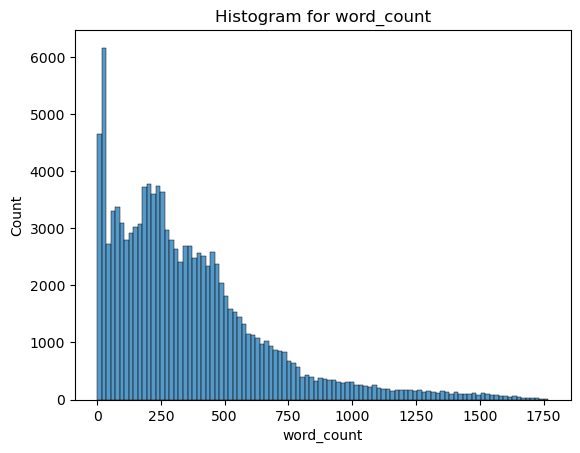

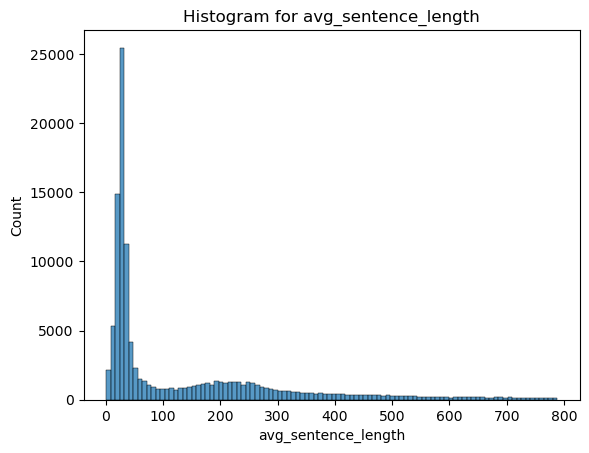

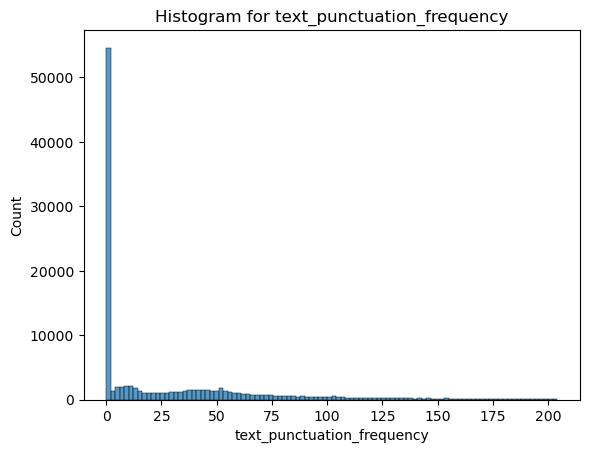

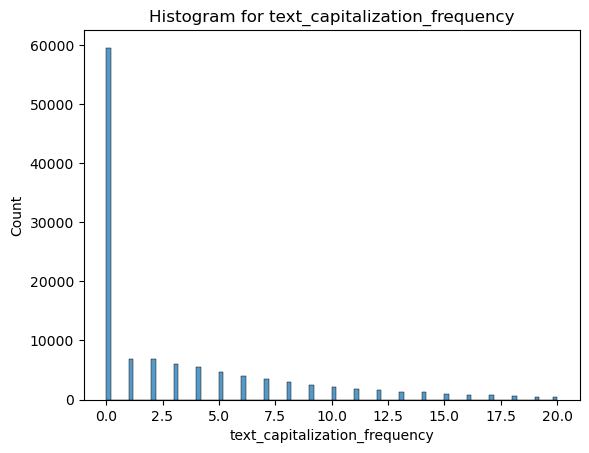

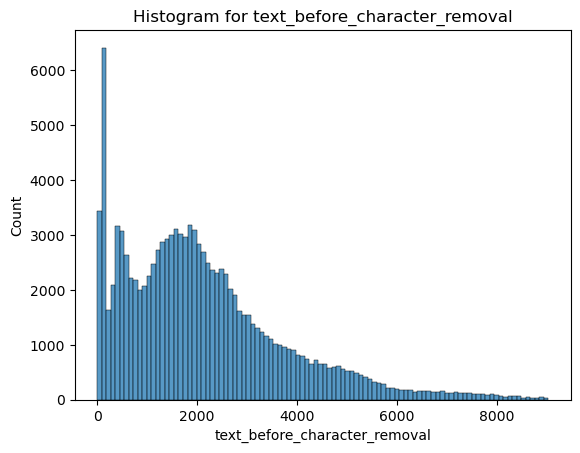

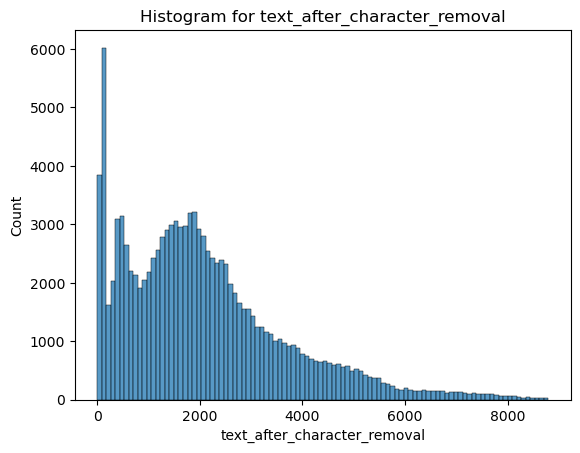

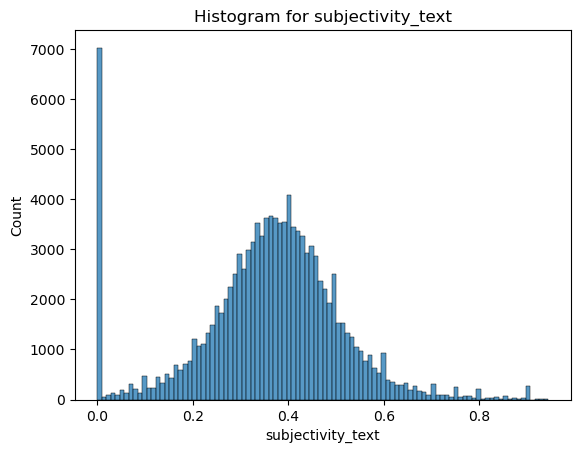

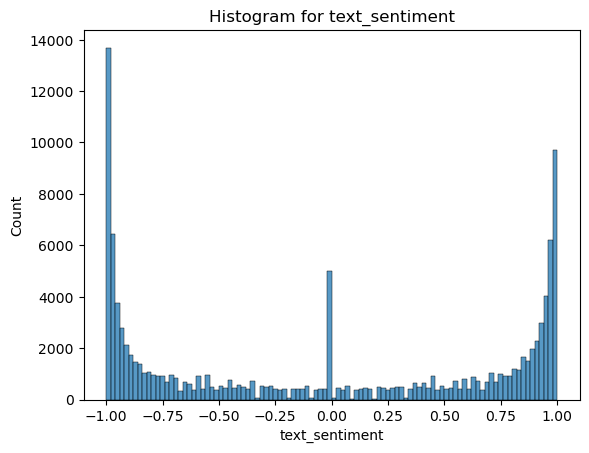

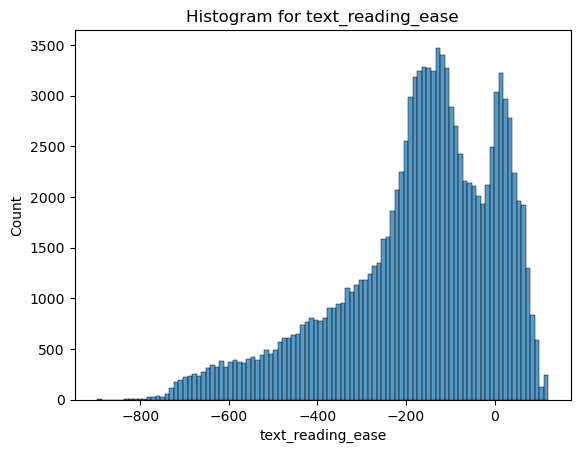

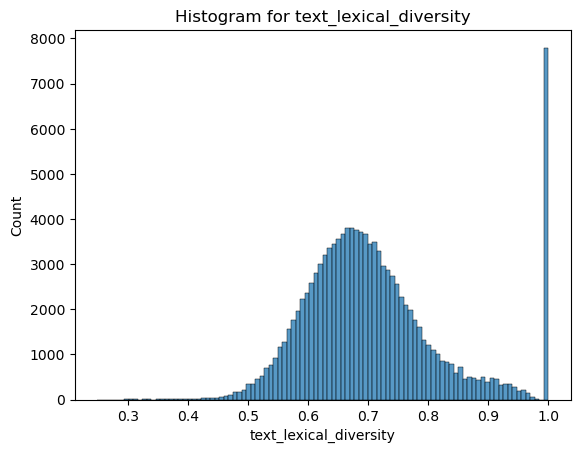

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['text', 'label', 'id', 'text_processed']

# Iterate over columns except those to be excluded
for column in df_new_features.iloc[:, :-1000].columns:
    if column not in columns_to_exclude:
        sns.histplot(df_new_features[column], bins=100, kde=False)
        plt.title(f'Histogram for {column}')
        plt.show()


In [15]:
df_new_features.iloc[:, :-1000].describe()

,label,word_count,avg_sentence_length,text_punctuation_frequency,text_capitalization_frequency,text_before_character_removal,text_after_character_removal,subjectivity_text,text_sentiment,text_reading_ease,text_lexical_diversity
count,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000
mean,0.483917,359.642976,136.214662,28.478400,2.994370,2127.825621,2084.250513,0.360037,-0.025635,-172.002911,0.710784
std,0.499743,302.740254,167.250566,40.887066,4.471356,1636.653637,1594.318992,0.153497,0.794497,178.974309,0.118299
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.999800,-896.840000,0.249307
25%,0.000000,140.000000,26.476190,0.000000,0.000000,895.000000,879.000000,0.286305,-0.900100,-259.420000,0.631443
50%,0.000000,288.000000,38.380952,6.000000,0.000000,1834.000000,1808.000000,0.371787,0.000000,-142.700000,0.690722
75%,1.000000,489.000000,213.000000,47.000000,5.000000,2919.000000,2860.000000,0.450000,0.862200,-36.120000,0.761905
max,1.000000,1768.000000,788.000000,204.000000,20.000000,9024.000000,8791.000000,0.944444,0.999900,121.220000,1.000000


In [16]:
df_new_features.describe()

,label,word_count,avg_sentence_length,text_punctuation_frequency,text_capitalization_frequency,text_before_character_removal,text_after_character_removal,subjectivity_text,text_sentiment,text_reading_ease,...,BOW_worri,BOW_worth,BOW_write,BOW_wrong,BOW_wrote,BOW_ye,BOW_year,BOW_yearold,BOW_york,BOW_young
count,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,...,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000,114561.000000
mean,0.483917,359.642976,136.214662,28.478400,2.994370,2127.825621,2084.250513,0.360037,-0.025635,-172.002911,...,0.049790,0.031922,0.095809,0.052217,0.042266,0.039010,0.402929,0.053360,0.153866,0.066768
std,0.499743,302.740254,167.250566,40.887066,4.471356,1636.653637,1594.318992,0.153497,0.794497,178.974309,...,0.217512,0.175793,0.294331,0.222465,0.201196,0.193619,0.490489,0.224752,0.360821,0.249621
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.999800,-896.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,140.000000,26.476190,0.000000,0.000000,895.000000,879.000000,0.286305,-0.900100,-259.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,288.000000,38.380952,6.000000,0.000000,1834.000000,1808.000000,0.371787,0.000000,-142.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,489.000000,213.000000,47.000000,5.000000,2919.000000,2860.000000,0.450000,0.862200,-36.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1768.000000,788.000000,204.000000,20.000000,9024.000000,8791.000000,0.944444,0.999900,121.220000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_new_features.shape

(114561, 1013)

In [18]:
df_new_features.shape

(114561, 1013)

In [19]:
df_new_features.to_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
df_new_features_2=df_new_features.iloc[:, :-1000]
df_new_features_2.to_csv(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\Tableau.csv")

df_new_features_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114561 entries, 96862 to 121958
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   text                           114561 non-null  object 
 1   label                          114561 non-null  float64
 2   word_count                     114561 non-null  int32  
 3   avg_sentence_length            114561 non-null  float64
 4   text_punctuation_frequency     114561 non-null  int64  
 5   text_capitalization_frequency  114561 non-null  int32  
 6   text_before_character_removal  114561 non-null  int64  
 7   text_after_character_removal   114561 non-null  int64  
 8   text_processed                 114561 non-null  object 
 9   subjectivity_text              114561 non-null  float64
 10  text_sentiment                 114561 non-null  float64
 11  text_reading_ease              114561 non-null  float64
 12  text_lexical_diversity         

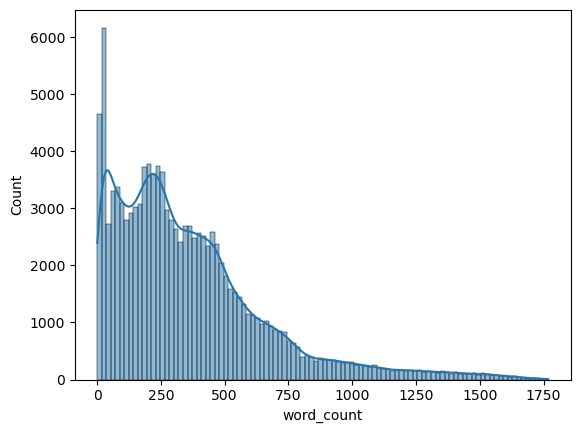

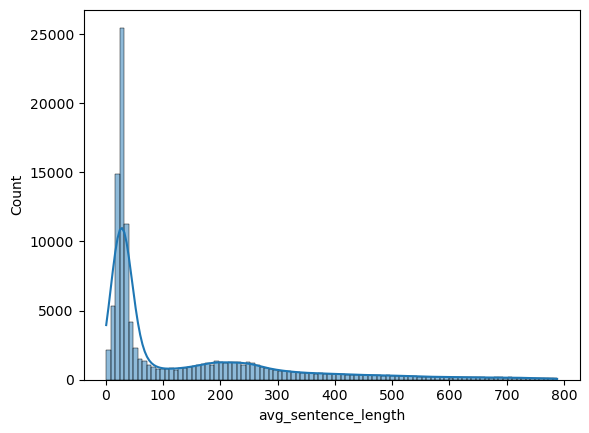

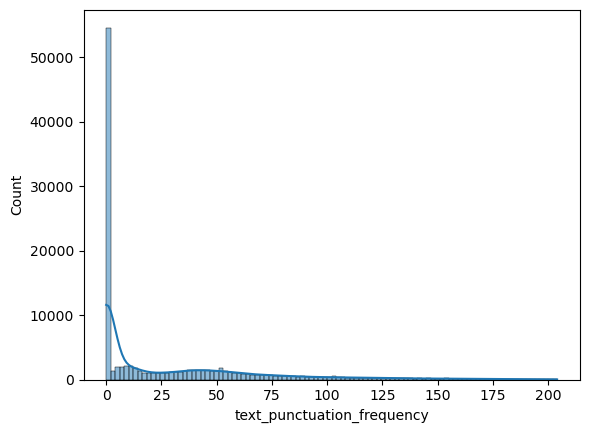

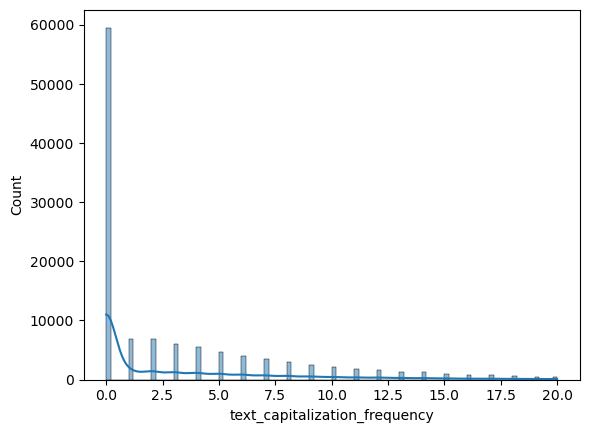

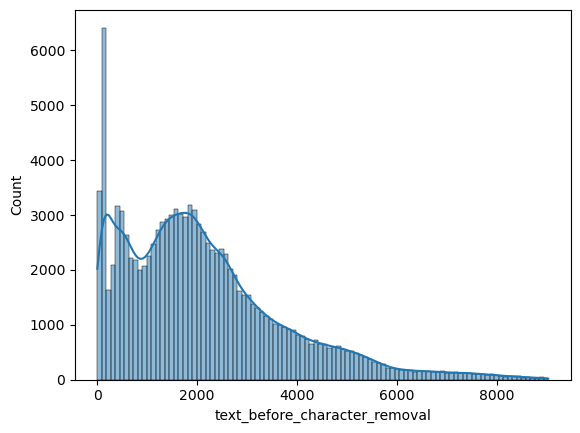

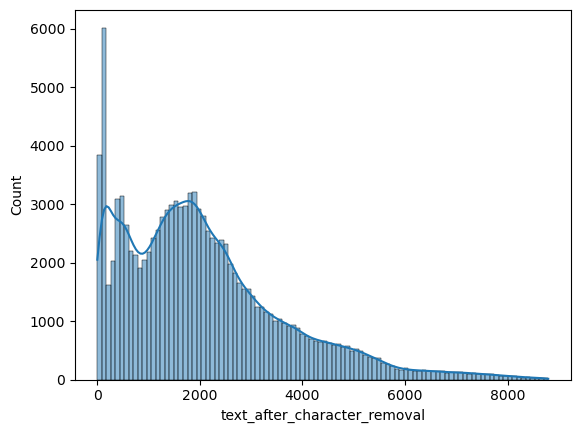

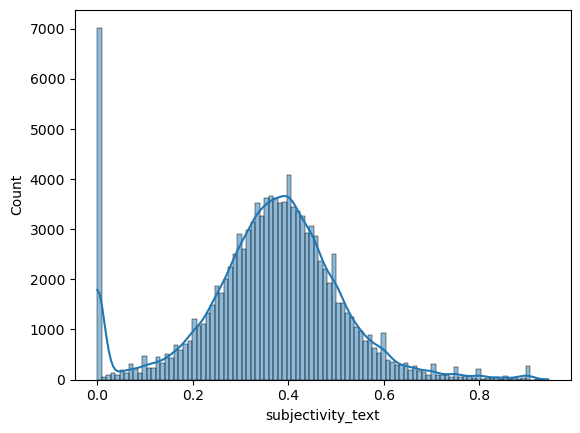

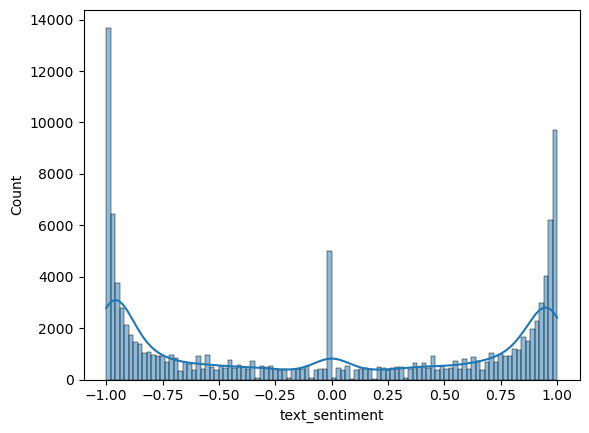

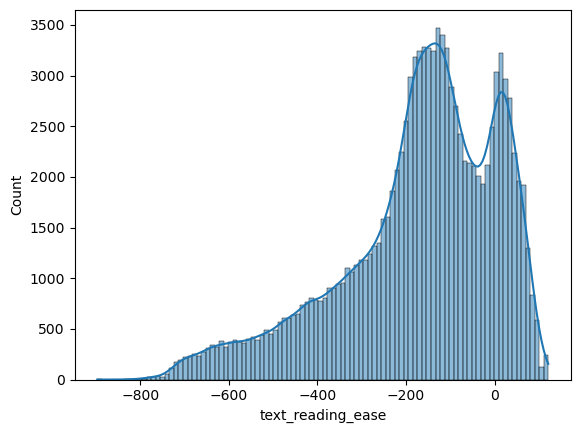

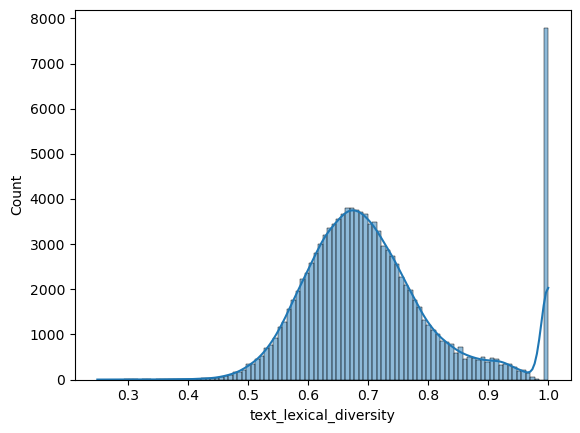

In [20]:
col=[ 'word_count', 'avg_sentence_length',
       'text_punctuation_frequency', 'text_capitalization_frequency',
       'text_before_character_removal', 'text_after_character_removal',
        'subjectivity_text', 'text_sentiment',
       'text_reading_ease', 'text_lexical_diversity']
for i in col:
    sns.histplot(df_new_features_2[i], bins=100, kde=True)
    plt.show()

In [21]:
df_ints=df_new_features_2[[ 'label','word_count', 'avg_sentence_length',
       'text_punctuation_frequency', 'text_capitalization_frequency',
       'text_before_character_removal', 'text_after_character_removal',
        'subjectivity_text', 'text_sentiment',
       'text_reading_ease', 'text_lexical_diversity']]

In [22]:
corr_matrix=df_ints.corr().abs()
corr_matrix_labels=corr_matrix['label']
print(corr_matrix_labels)

label                            1.000000
word_count                       0.067877
avg_sentence_length              0.157993
text_punctuation_frequency       0.119928
text_capitalization_frequency    0.091215
text_before_character_removal    0.035402
text_after_character_removal     0.032091
subjectivity_text                0.006686
text_sentiment                   0.000777
text_reading_ease                0.014400
text_lexical_diversity           0.039851
Name: label, dtype: float64


In [23]:
df_ints.dropna(axis=0,inplace=True)
df_ints.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114561 entries, 96862 to 121958
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   label                          114561 non-null  float64
 1   word_count                     114561 non-null  int32  
 2   avg_sentence_length            114561 non-null  float64
 3   text_punctuation_frequency     114561 non-null  int64  
 4   text_capitalization_frequency  114561 non-null  int32  
 5   text_before_character_removal  114561 non-null  int64  
 6   text_after_character_removal   114561 non-null  int64  
 7   subjectivity_text              114561 non-null  float64
 8   text_sentiment                 114561 non-null  float64
 9   text_reading_ease              114561 non-null  float64
 10  text_lexical_diversity         114561 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 9.6 MB


C:\Users\brand\AppData\Local\Temp\ipykernel_18280\3507724877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ints.dropna(axis=0,inplace=True)


In [24]:
import scipy.stats as stats

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(df_ints['avg_sentence_length'], df_ints['label'])

# Output the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

# Interpret the results based on the significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Correlation Coefficient: 0.1579925753638672
P-Value: 0.0
Reject the null hypothesis. There is a significant correlation.


In [25]:
import numpy as np
import scipy.stats as stats

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = stats.pearsonr(df_ints['avg_sentence_length'], df_ints['label'])
n = len(df_ints['avg_sentence_length'])

# Fisher transformation to z scores
transformed_z = np.arctanh(correlation_coefficient)
standard_error = 1.0 / np.sqrt(n - 3)  # Standard error for Fisher transformed z

# Calculate confidence interval for Fisher transformed z
z_score_critical = stats.norm.ppf(0.975)  
confidence_interval = transformed_z - z_score_critical * standard_error, transformed_z + z_score_critical * standard_error

# Back-transform to obtain confidence interval for the correlation coefficient
lower_bound = np.tanh(confidence_interval[0])
upper_bound = np.tanh(confidence_interval[1])

# Output the confidence interval
print("Confidence Interval:", (lower_bound, upper_bound))


Confidence Interval: (0.15234125752854322, 0.1636335620226276)


In [27]:
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable and independent variables
dependent_variable = 'label'
independent_variables = ['word_count', 'avg_sentence_length',
                         'text_capitalization_frequency', 'text_before_character_removal',
                          'subjectivity_text', 'text_sentiment',
                         'text_reading_ease', 'text_lexical_diversity']

# Create X (independent variables) and y (dependent variable)
X = df[independent_variables]
y = df[dependent_variable]

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     632.7
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:06:46   Log-Likelihood:                -80611.
No. Observations:              114561   AIC:                         1.612e+05
Df Residuals:                  114552   BIC:                         1.613e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [33]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Define the number of samples and sample size
num_samples = 10
sample_size = 10000

# Initialize an empty set for significant columns
significant_columns = set(df.columns)

# Initialize an empty set to track any non-significant columns across samples
non_significant_across_samples = set()

# Perform sampling and analyze each subset
for i in range(num_samples):
    sampled_subset = df.sample(n=sample_size, replace=True, random_state=i)

    X = sampled_subset.drop(columns=['label'])
    y = sampled_subset['label']

    # Fit the regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Extract columns with any P>|t| value > 0.05
    p_values = model.pvalues.drop(['const'])  # Exclude constant term
    non_significant_cols = p_values[p_values > 0.01].index.tolist()

    # Update the set of non-significant columns across samples
    non_significant_across_samples |= set(non_significant_cols)

# Identify significant columns by excluding non-significant columns across samples
significant_columns -= non_significant_across_samples

# Display the set of significant columns
print("Significant Columns across all Samples:")
print(significant_columns)


Significant Columns across all Samples:
{'BOW_went', 'text_reading_ease', 'BOW_york', 'BOW_breitbart', 'BOW_video', 'BOW_say', 'BOW_women', 'BOW_media', 'BOW_tell', 'label', 'BOW_im', 'BOW_told', 'BOW_dont', 'avg_sentence_length', 'text_capitalization_frequency', 'BOW_imag', 'BOW_add', 'BOW_said', 'BOW_medium', 'BOW_got', 'BOW_led'}


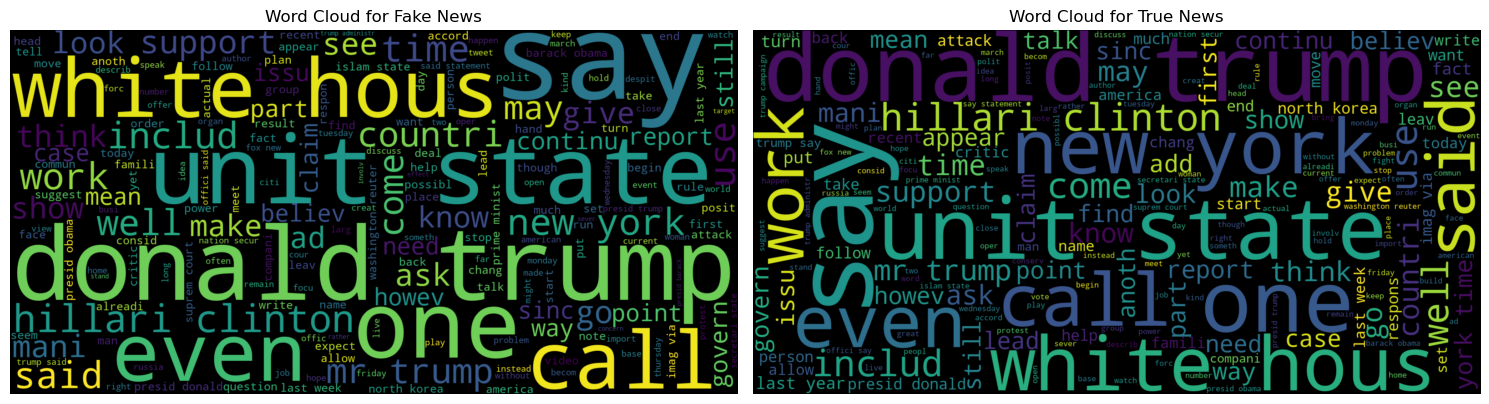

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text_processed' is the column containing processed text
fake_news_text = ' '.join(df_new_features_2[df_new_features_2['label'] == 0]['text_processed'])
true_news_text = ' '.join(df_new_features_2[df_new_features_2['label'] == 1]['text_processed'])

# Generate word clouds for fake news
wordcloud_fake = WordCloud(width=1600, height=800, background_color='black').generate(fake_news_text)

# Generate word clouds for true news
wordcloud_true = WordCloud(width=1600, height=800, background_color='black').generate(true_news_text)

# Display the word clouds using Matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.tight_layout()
plt.show()


